#MLR_TOYOTA

## Import Libraries

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from google.colab import files
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

import warnings
warnings.filterwarnings('ignore')

In [ ]:
upload=files.upload()

Saving ToyotaCorolla.csv to ToyotaCorolla.csv


In [ ]:
data=pd.read_csv('ToyotaCorolla.csv',encoding = "Latin-1", sep = ",")
data=data.loc[:,['Age_08_04','KM','HP','cc','Doors','Gears','Quarterly_Tax','Weight','Price']]
data.head()

,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight,Price
0,23,46986,90,2000,3,5,210,1165,13500
1,23,72937,90,2000,3,5,210,1165,13750
2,24,41711,90,2000,3,5,210,1165,13950
3,26,48000,90,2000,3,5,210,1165,14950
4,30,38500,90,2000,3,5,210,1170,13750


## EDA

In [ ]:
data.corr()

,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight,Price
Age_08_04,1.000000,0.505672,-0.156622,-0.098084,-0.148359,-0.005364,-0.198431,-0.470253,-0.876590
KM,0.505672,1.000000,-0.333538,0.102683,-0.036197,0.015023,0.278165,-0.028598,-0.569960
HP,-0.156622,-0.333538,1.000000,0.035856,0.092424,0.209477,-0.298432,0.089614,0.314990
cc,-0.098084,0.102683,0.035856,1.000000,0.079903,0.014629,0.306996,0.335637,0.126389
Doors,-0.148359,-0.036197,0.092424,0.079903,1.000000,-0.160141,0.109363,0.302618,0.185326
Gears,-0.005364,0.015023,0.209477,0.014629,-0.160141,1.000000,-0.005452,0.020613,0.063104
Quarterly_Tax,-0.198431,0.278165,-0.298432,0.306996,0.109363,-0.005452,1.000000,0.626134,0.219197
Weight,-0.470253,-0.028598,0.089614,0.335637,0.302618,0.020613,0.626134,1.000000,0.581198
Price,-0.876590,-0.569960,0.314990,0.126389,0.185326,0.063104,0.219197,0.581198,1.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Age_08_04      1436 non-null   int64
 1   KM             1436 non-null   int64
 2   HP             1436 non-null   int64
 3   cc             1436 non-null   int64
 4   Doors          1436 non-null   int64
 5   Gears          1436 non-null   int64
 6   Quarterly_Tax  1436 non-null   int64
 7   Weight         1436 non-null   int64
 8   Price          1436 non-null   int64
dtypes: int64(9)
memory usage: 101.1 KB


In [ ]:
data.describe()

,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight,Price
count,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000
mean,55.947075,68533.259749,101.502089,1576.85585,4.033426,5.026462,87.122563,1072.45961,10730.824513
std,18.599988,37506.448872,14.981080,424.38677,0.952677,0.188510,41.128611,52.64112,3626.964585
min,1.000000,1.000000,69.000000,1300.00000,2.000000,3.000000,19.000000,1000.00000,4350.000000
25%,44.000000,43000.000000,90.000000,1400.00000,3.000000,5.000000,69.000000,1040.00000,8450.000000
50%,61.000000,63389.500000,110.000000,1600.00000,4.000000,5.000000,85.000000,1070.00000,9900.000000
75%,70.000000,87020.750000,110.000000,1600.00000,5.000000,5.000000,85.000000,1085.00000,11950.000000
max,80.000000,243000.000000,192.000000,16000.00000,5.000000,6.000000,283.000000,1615.00000,32500.000000


In [ ]:
data[data.duplicated()].shape

(1, 9)

In [ ]:
data[data.duplicated()]

,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight,Price
113,8,13253,116,2000,5,5,234,1320,24950


In [ ]:
data = data.drop_duplicates()

## Visualization

<Axes: xlabel='Price', ylabel='Quarterly_Tax'>

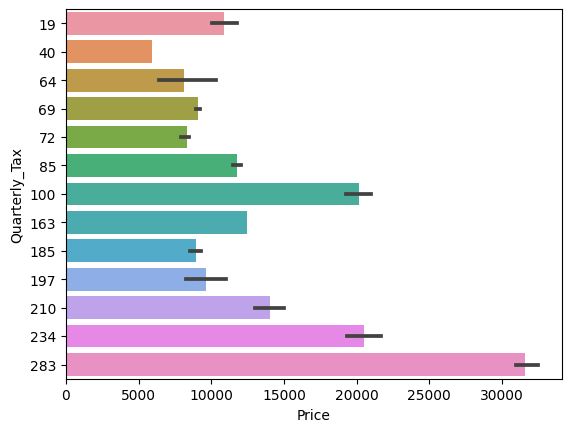

In [ ]:
sns.barplot(x='Price', y='Quarterly_Tax', data=data, orient='h')

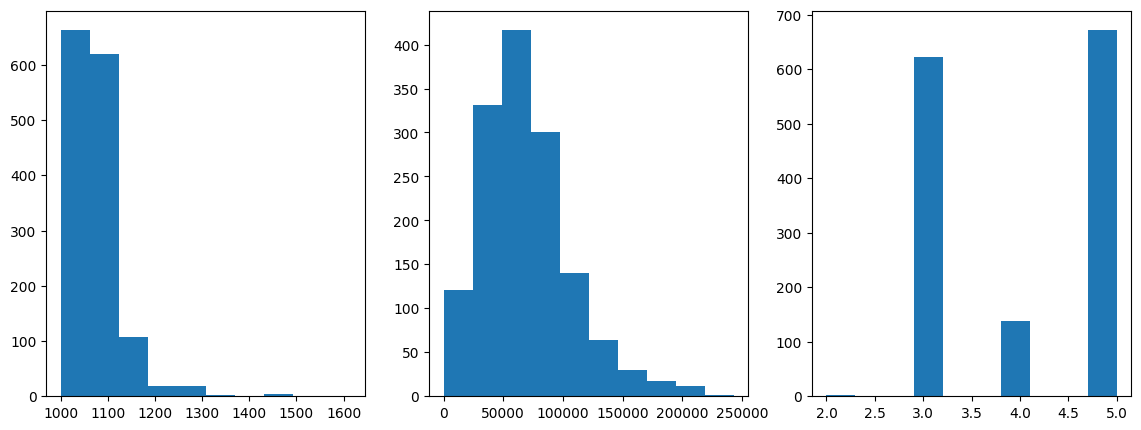

In [ ]:
fig = plt.figure(figsize=(14,5))
plt.subplot(1,3,1)
plt.hist(data['Weight'])

plt.subplot(1,3,2)
plt.hist(data['KM']);

plt.subplot(1,3,3)
plt.hist(data['Doors']);
plt.show()

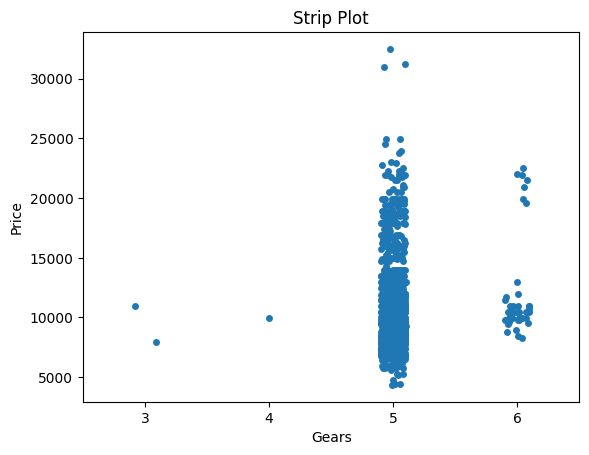

In [ ]:
sns.stripplot(x='Gears',y='Price', data=data, jitter=True)
plt.xlabel('Gears')
plt.ylabel('Price')
plt.title('Strip Plot')
plt.show()

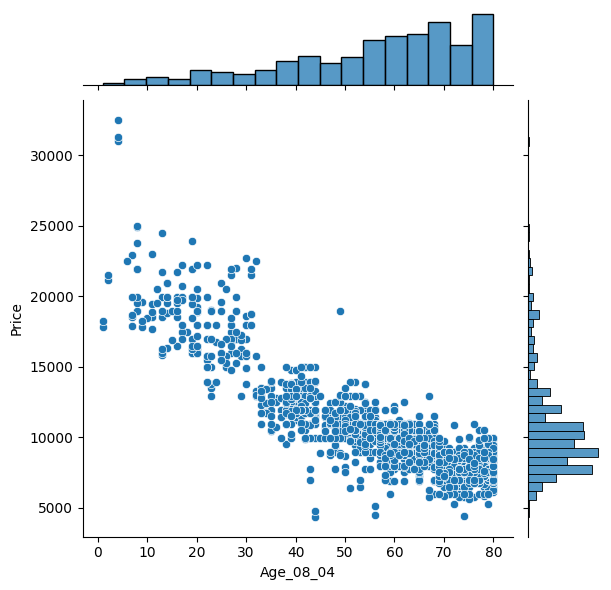

In [ ]:
sns.jointplot(x='Age_08_04', y='Price', data=data);

## Split x and y

In [ ]:
x=data.loc[:,['Age_08_04','KM','HP','cc','Doors','Gears','Quarterly_Tax','Weight']]
x.head()

,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,23,46986,90,2000,3,5,210,1165
1,23,72937,90,2000,3,5,210,1165
2,24,41711,90,2000,3,5,210,1165
3,26,48000,90,2000,3,5,210,1165
4,30,38500,90,2000,3,5,210,1170


In [ ]:
y=data.iloc[:,-1]
y.head()

0    13500
1    13750
2    13950
3    14950
4    13750
Name: Price, dtype: int64

## Model Fitting

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2, random_state=10)

In [ ]:
regressor=LinearRegression()
regressor.fit(x_train,y_train)
y_pred_train=regressor.predict(x_train)
y_pred_test=regressor.predict(x_test)
mse=np.mean((y_pred_test-y_test)**2)
print('Mean_Square_Error  :',mse)

Mean_Square_Error  : 1999215.5245022648


In [ ]:
lreg_coefficient=pd.DataFrame()
lreg_coefficient['Columns']=x_train.columns
lreg_coefficient['model_values']=pd.Series(regressor.coef_)
lreg_coefficient

,Columns,model_values
0,Age_08_04,-123.907096
1,KM,-0.019244
2,HP,32.366965
3,cc,-0.032640
4,Doors,18.317802
5,Gears,601.585066
6,Quarterly_Tax,3.123374
7,Weight,15.109675


<Axes: xlabel='model_values', ylabel='Columns'>

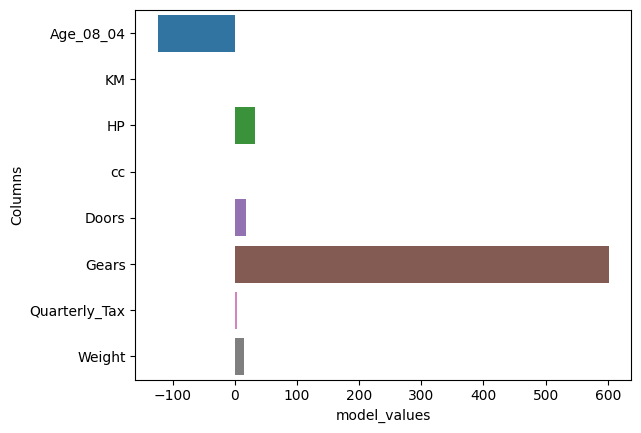

In [ ]:
sns.barplot(x='model_values', y='Columns', data=lreg_coefficient, orient='h')

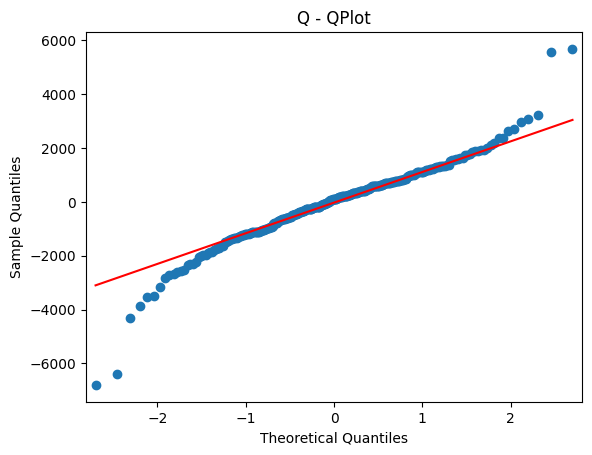

In [ ]:
res = y_pred_test-y_test
fig = sm.qqplot(data=res, line="q")
plt.title("Q - QPlot")
plt.show()

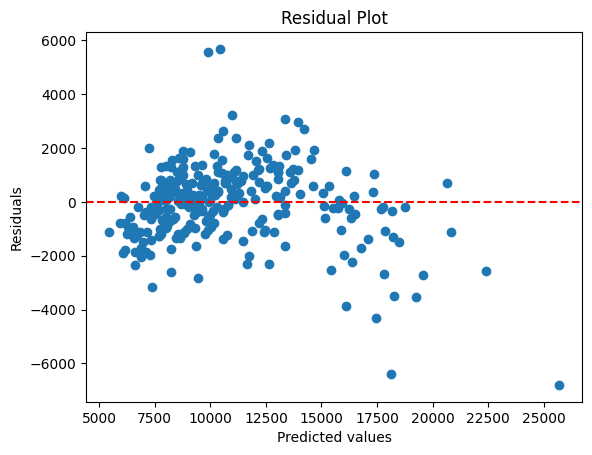

In [ ]:
plt.scatter(y_pred_test, res)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

## Accuracy

In [ ]:
r2_train=r2_score(y_train,y_pred_train)
r2_test=r2_score(y_test,y_pred_test)
print(r2_train,r2_test)

0.8602414335318804 0.8670323701891863
